<a href="https://colab.research.google.com/github/KryssyCo/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Krista_Shepard_DSPT2_U1S2M3_Assignment_3_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).











In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

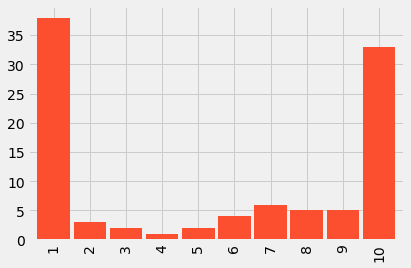

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

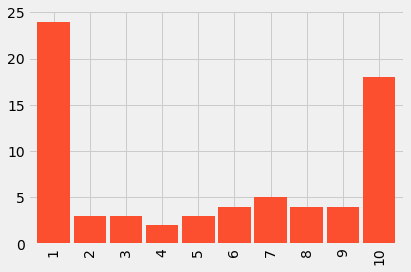

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

Text(0, 0.5, 'Percent of Total Votes')

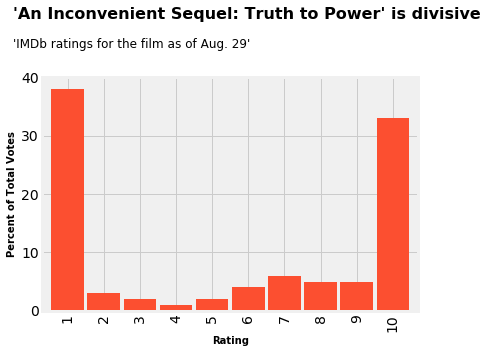

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='white')
fake.plot.bar(color='C1', width=0.9);
plt.text(x = -1.5, y = 50, fontsize=16, fontweight = 'bold', 
         s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x = -1.5, y = 45, fontsize=12, 
         s = "'IMDb ratings for the film as of Aug. 29'")
plt.yticks(range(0, 41, 10))
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold' )

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.category.value_counts()

Males Aged 30-44      4216
Top 1000 voters       4216
Males                 4216
Females               4216
Aged 30-44            4216
Aged 45+              4216
Males under 18        4216
Females Aged 30-44    4216
Males Aged 18-29      4216
US users              4216
Females Aged 18-29    4216
Non-US users          4216
Males Aged 45+        4216
Aged 18-29            4216
Aged under 18         4216
Females Aged 45+      4216
IMDb users            4216
IMDb staff            4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df_imdb =df[df.category =='IMDb users']
df_imdb.shape

(4216, 27)

In [0]:
final = df_imdb.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
columns = ['{}_pct'.format(i) for i in range(1,11)]
columns = [f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [0]:
data = final[columns]
data = data.T
data.index = range(1,11)
data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


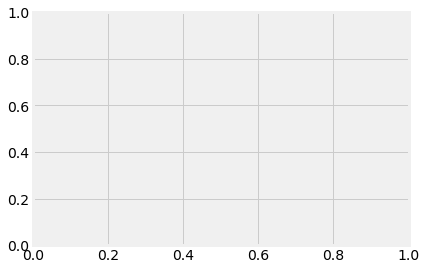

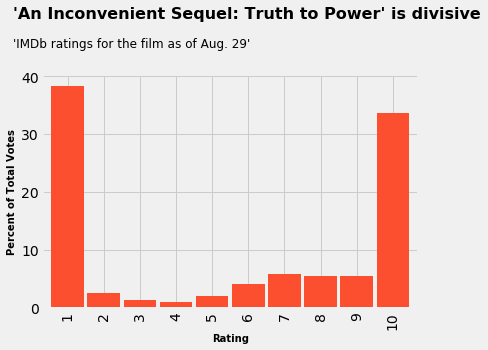

In [0]:
fig, ax = plt.subplots(facecolor='white')
data.plot.bar(color='C1', width=0.9, legend = False);
plt.text(x = -1.5, y = 50, fontsize=16, fontweight = 'bold', 
         s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x = -1.5, y = 45, fontsize=12, 
         s = "'IMDb ratings for the film as of Aug. 29'")
plt.yticks(range(0, 41, 10))
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold'); 

## Quick Introduction to Altair Plotting Package

In [0]:
import altair as alt
from vega_datasets import data

source = data.cars()
source.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [0]:
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
    tooltip=['Name','Origin','Weight_in_lbs'],
).add_selection(
    brush
).properties(
    width=350,
    height=350
)

base.encode(x='Horsepower') | base.encode(x='Acceleration') | base.encode(x='Weight_in_lbs')

alt.HConcatChart(...)

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt

In [0]:
from IPython.display import display, Image

url1 = 'https://fivethirtyeight.com/wp-content/uploads/2015/11/hickey-side-dish-1.png?w=575'
example1 = Image(url=url1, width=400)

display(example1)

In [23]:
# Read in the data and check it out
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')
print(df.head())
print(df.shape)
print(df.isna().sum())
df.describe(include=['object'])

   RespondentID  ...           US Region
0    4337954960  ...     Middle Atlantic
1    4337951949  ...  East South Central
2    4337935621  ...            Mountain
3    4337933040  ...             Pacific
4    4337931983  ...             Pacific

[5 rows x 65 columns]
(1058, 65)
RespondentID                                                                                                                                       0
Do you celebrate Thanksgiving?                                                                                                                     0
What is typically the main dish at your Thanksgiving dinner?                                                                                      84
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)                                                           1023
How is the main dish typically cooked?                                                                                      

,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these de

In [24]:
# Simplify the column names we will use
df = df.rename(columns={"Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts": "sprouts",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots": "carrots",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower": "cauliflower",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn": "corn",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread": "cornbread",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad": "fruit_salad",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole": "green_beans",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese": "mac_cheese",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes": "mashed_potatoes",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits": "rolls",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash": "squash",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad": "veggie_salad",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole": "potato_cass",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)": "other",
                        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1": "other_1"
                         })
df.head()


,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Blondies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Brownies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Carrot cake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cheesecake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cookies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Fudge,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Ice cream,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Peach cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - None,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Do you typically pray before or after the Thanksgiving meal?,How far will you travel for Thanksgiving?,Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade,"What's the age cutoff at your ""kids' table"" at Thanksgiving?",Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in

In [25]:
# Check null values in category 'US Region' - these will be eliminated later
df1 = df.loc[df['US Region'].isnull()] 
df1.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Blondies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Brownies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Carrot cake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cheesecake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cookies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Fudge,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Ice cream,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Peach cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - None,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Do you typically pray before or after the Thanksgiving meal?,How far will you travel for Thanksgiving?,Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade,"What's the age cutoff at your ""kids' table"" at Thanksgiving?",Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in

In [26]:
# Simplify by creating a subset of just the side dishes we will work with
side_dishes = df[['US Region',
                  'sprouts',
                  'carrots',
                  'cauliflower',
                  'corn',
                  'cornbread', 
                  'fruit_salad',
                  'green_beans',
                  'mac_cheese',
                  'mashed_potatoes',
                  'rolls',
                  'squash',
                  'veggie_salad',
                  'potato_cass',
                  'other',
                  'other_1'
                 ]]
side_dishes.head()

,US Region,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1
0,Middle Atlantic,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,East South Central,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad
2,Mountain,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
3,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN


In [27]:
# Create a dataframe with a count of the side dishes by each region
sd_counts = side_dishes.groupby(['US Region']).count()
sd_counts

,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1
US Region,,,,,,,,,,,,,,,
East North Central,22,28,13,76,23,20,103,21,127,123,15,26,90,17,17
East South Central,7,15,5,31,16,20,49,21,45,49,12,8,44,10,10
Middle Atlantic,41,45,25,77,33,26,92,20,130,106,44,33,99,16,16
Mountain,6,11,4,17,10,11,31,3,38,33,5,12,26,5,5
New England,12,25,4,22,10,5,33,6,52,41,31,11,34,7,7
Pacific,29,30,18,55,37,35,84,18,112,99,17,39,85,13,13
South Atlantic,27,48,11,96,53,39,150,79,157,158,31,39,144,27,27
West North Central,3,12,3,36,12,18,60,12,65,62,2,15,33,5,5
West South Central,4,21,3,46,34,30,66,20,70,73,8,15,63,10,10


In [28]:
# Consolidate the 9 regions so that match the graph's 6 regions
sd_counts = sd_counts.reset_index().replace({'US Region': {'Mountain':'Pacific'}}).groupby('US Region', sort=False).sum()
sd_counts = sd_counts.reset_index().replace({'US Region': {'Middle Atlantic':'New England'}}).groupby('US Region', sort=False).sum()
sd_counts = sd_counts.reset_index().replace({'US Region': {'East South Central':'South Atlantic'}}).groupby('US Region', sort=False).sum()
sd_counts

,sprouts,carrots,cauliflower,corn,cornbread,fruit_salad,green_beans,mac_cheese,mashed_potatoes,rolls,squash,veggie_salad,potato_cass,other,other_1
US Region,,,,,,,,,,,,,,,
East North Central,22,28,13,76,23,20,103,21,127,123,15,26,90,17,17
South Atlantic,34,63,16,127,69,59,199,100,202,207,43,47,188,37,37
New England,53,70,29,99,43,31,125,26,182,147,75,44,133,23,23
Pacific,35,41,22,72,47,46,115,21,150,132,22,51,111,18,18
West North Central,3,12,3,36,12,18,60,12,65,62,2,15,33,5,5
West South Central,4,21,3,46,34,30,66,20,70,73,8,15,63,10,10


In [29]:
# Create a final dataframe for each region calculating the disproportionate percent of each side dish
import pandas as pd

# Function 
def disp_data(dframe_input, dframe_final, row_name, col_name):

  dfToList = dframe_input[col_name].tolist()
  dfToList.sort(reverse=True)
  if dfToList[0] == dframe_input.loc[row_name, col_name]:
    nvalue = dfToList[1]
  else:
    nvalue = dfToList[1]
    
  vvalue = dframe_input.loc[row_name, col_name]
  pvalue = ((vvalue - nvalue)/nvalue)*100
  dframe_final = dframe_final.append({'region': row_name,
                                      'col_value': col_name,
                                      'value': vvalue,
                                      'next_value': nvalue,
                                      'dispro_pct': pvalue}, ignore_index=True)
  return dframe_final
    

final_data = pd.DataFrame(columns=['region', 'col_value', 'value', 'next_value', 'dispro_pct'])  

for column in sd_counts:
  if column != 'US Region':
    final_data = disp_data(sd_counts, final_data, 'Pacific', column)

final_data.sort_values(by='dispro_pct', ascending=False)

,region,col_value,value,next_value,dispro_pct
11,Pacific,veggie_salad,51,47,8.510638
0,Pacific,sprouts,35,35,0.000000
2,Pacific,cauliflower,22,22,0.000000
4,Pacific,cornbread,47,47,0.000000
5,Pacific,fruit_salad,46,46,0.000000
6,Pacific,green_beans,115,125,-8.000000
9,Pacific,rolls,132,147,-10.204082
12,Pacific,potato_cass,111,133,-16.541353
8,Pacific,mashed_potatoes,150,182,-17.582418
7,Pacific,mac_cheese,21,26,-19.230769


In [34]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
dishes = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/master/side_dishes.csv')

alt.Chart(states).mark_geoshape().encode(
    color='Side Dish:N'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(dishes, 'id', ['Side Dish'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300,
    title="Side Dishes of America's Regions")


alt.Chart(...)